In [151]:
import pathlib
import sys

import astropy.table as at
import astropy.units as u
import gala.dynamics as gd
import gala.integrate as gi
import gala.potential as gp
import jax
import jax.numpy as jnp
import jaxopt
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
from astropy.constants import G
from gala.units import galactic
from pysr import PySRRegressor
from sympy.codegen.pyutils import PythonCodePrinter

jax.config.update("jax_enable_x64", True)
import agama
import jax.numpy as jnp

agama.setUnits(mass=u.Msun, length=u.kpc, time=u.Myr)

In [109]:
# model = PySRRegressor.from_file("hall_of_fame_2023-11-09_132503.959.pkl")
model = PySRRegressor.from_file("hall_of_fame_2023-11-09_135344.763.pkl")

Checking if hall_of_fame_2023-11-09_135344.763.pkl exists...
Loading model from hall_of_fame_2023-11-09_135344.763.pkl


In [153]:
# i = 16
i = None
model.sympy(i)

-0.8174305758200171*log(36.743526841029097*b/m - r_e + 1.7748241828470024 + 0.8174305758200171*b**2/10.61181062960402**r_e) - (b - 0.37361794441676788)/m

In [154]:
pcp = PythonCodePrinter()
pcp.doprint(model.sympy(i))

'-0.8174305758200171*math.log(36.743526841029097*b/m - r_e + 1.7748241828470024 + 0.8174305758200171*10.61181062960402**(-r_e)*b**2) - (b - 0.37361794441676788)/m'

In [142]:
data = np.load("Xy.npz")

In [143]:
pred_flat_y = np.exp(model.predict(data["flat_X"], i))

pred_y = np.full_like(y, np.nan)
pred_y.flat[data["mask"]] = pred_flat_y

In [144]:
np.all(pred_y > 0)

False

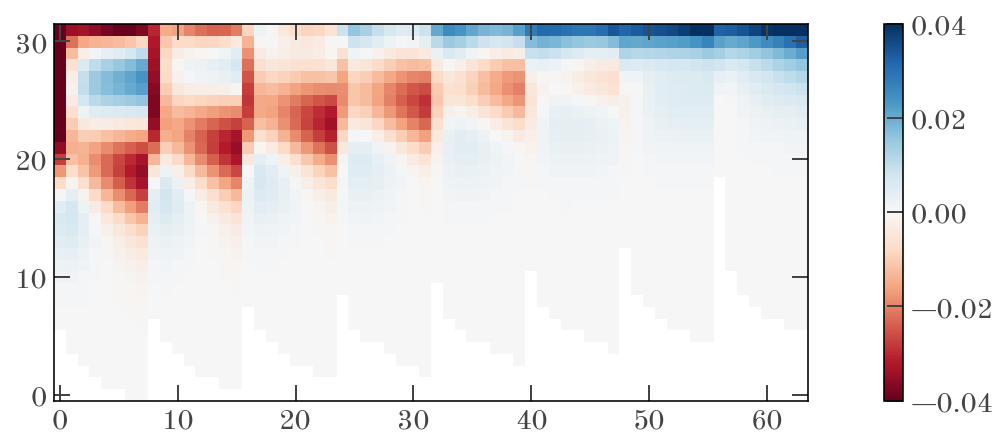

In [145]:
plt.figure(figsize=(12, 3))
plt.imshow((data["y"] - pred_y).T, origin="lower", cmap="RdBu", vmin=-0.04, vmax=0.04)
plt.colorbar()

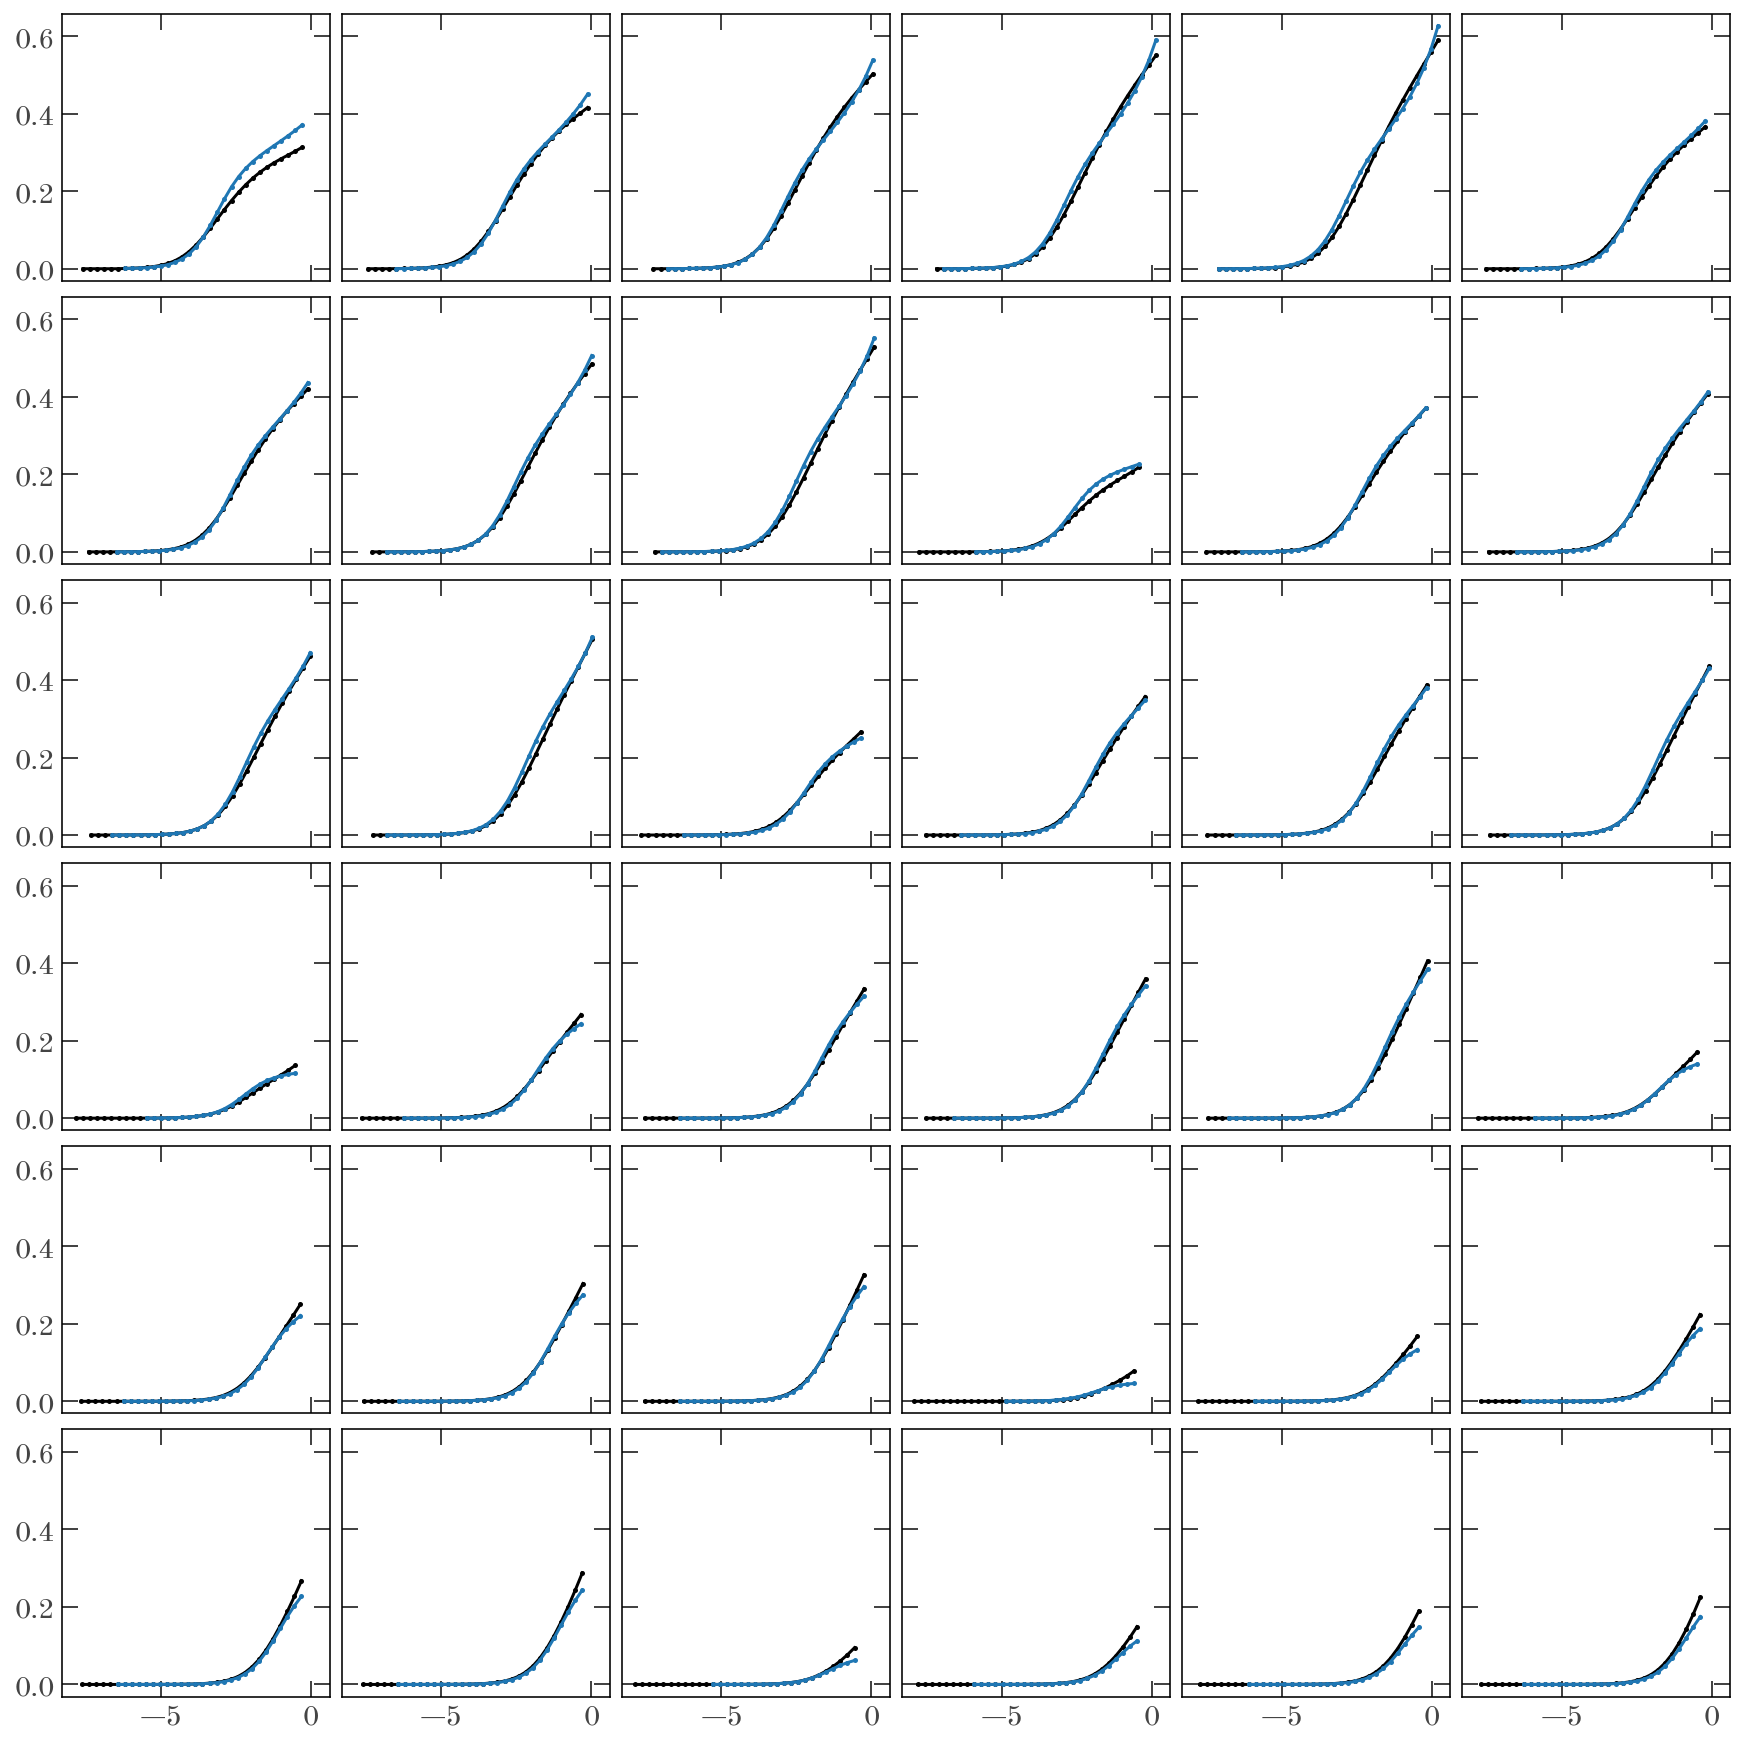

In [146]:
fig, axes = plt.subplots(
    6, 6, figsize=(12, 12), sharex=True, sharey=True, layout="constrained"
)
for j, k in enumerate(np.linspace(0, X.shape[0] - 1, axes.size).astype(int)):
    ax = axes.flat[j]
    ax.plot(data["X"][k, :, 0], data["y"][k])
    ax.plot(data["X"][k, :, 0], pred_y[k])

# ax.set_xscale('log')